In [1]:
import pandas as pd
#pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as md
import math

In [2]:
spydata = pd.read_csv('spy.csv')
print(spydata.columns) # date, open, high, low, close, adj close, volume
spydata.head()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.968958,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.153660,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.209057,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.486113,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.596937,531500


### Break down 'Date' column into 'Year', 'Month', 'Day' columns

In [3]:
spydata['Date'] = pd.to_datetime(spydata['Date'])
spydata.insert(0, 'Year', spydata['Date'].dt.year)
spydata.insert(1, 'Month', spydata['Date'].dt.month)
spydata.insert(2, 'Day', spydata['Date'].dt.day)
spydata['Date'] = spydata['Date'].dt.date

spydata.head()

,Year,Month,Day,Date,Open,High,Low,Close,Adj Close,Volume
0,1993,1,29,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.968958,1003200
1,1993,2,1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.153660,480500
2,1993,2,2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.209057,201300
3,1993,2,3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.486113,529400
4,1993,2,4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.596937,531500


### Display line graphs of open and close prices over each year

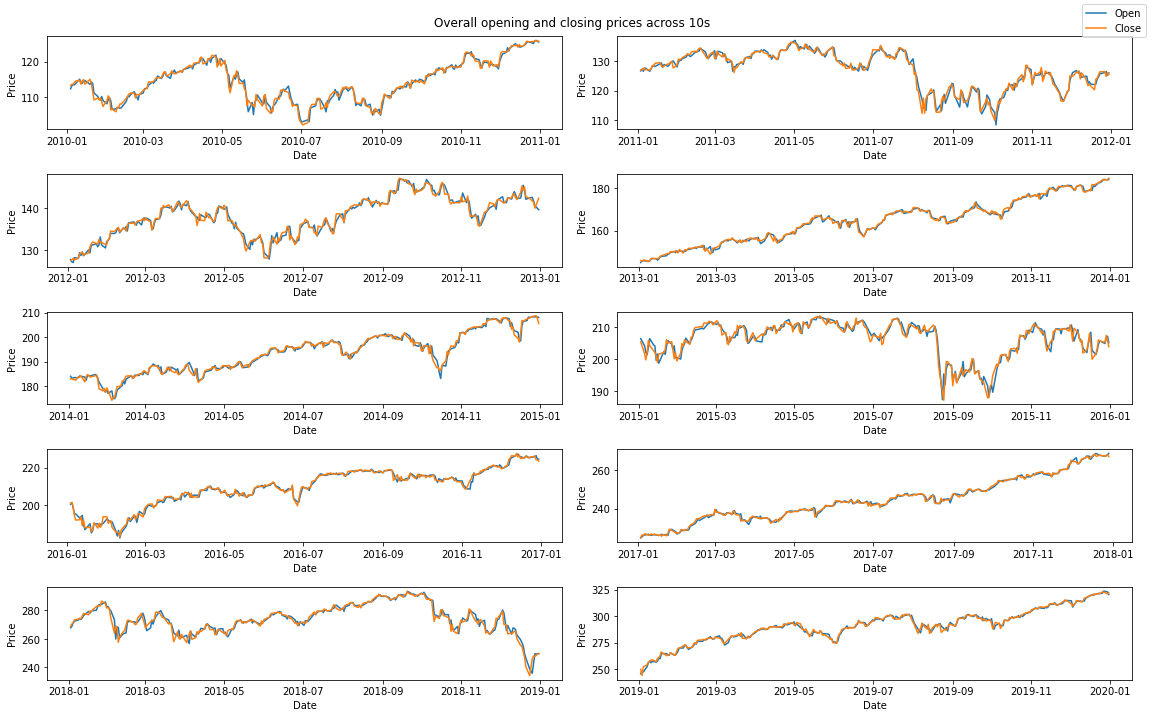

In [4]:
fig, axes = plt.subplots(5, 2, figsize=(16,10))

data = spydata.melt(id_vars=['Date','Year'], value_vars=['Open','Close'], var_name = 'State', value_name='Price')    

data2010 = data.loc[data['Year'] == 2010]
data2011 = data.loc[data['Year'] == 2011]
data2012 = data.loc[data['Year'] == 2012]
data2013 = data.loc[data['Year'] == 2013]
data2014 = data.loc[data['Year'] == 2014]
data2015 = data.loc[data['Year'] == 2015]
data2016 = data.loc[data['Year'] == 2016]
data2017 = data.loc[data['Year'] == 2017]
data2018 = data.loc[data['Year'] == 2018]
data2019 = data.loc[data['Year'] == 2019]

allData = [data2010, data2011, data2012, data2013, data2014, data2015, data2016, data2017, data2018, data2019]

fig.suptitle('Overall opening and closing prices across 10s')

index = 0

for r in range(0, 5):
    for c in range(0, 2):
        sns.lineplot(ax=axes[r,c], x=allData[index].Date, y= allData[index].Price, hue= allData[index].State, legend=False)
        index = index + 1

fig.legend(['Open','Close'])

plt.tight_layout()
plt.show()

- Scanning line graphs above, there was no big gap between opening and closing prices within a single day
- But for further investigation, bar graphs in below can be referred
- Overall, in 2016, 2017 and 2019, graphs have grown smoothly but in years such as 2010, 2011, 2015 and 2018 had dramatic plunges

<2010>
- Downturn happened in between 2010-05 and 2010-09 (lasted for 4 months)

- "Tom Schrader, managing director at Stifel Nicolaus, says that once stocks reached 1200, it triggered computer programmes that were set up to sell off at that level"
- Potentially, mass number of trading algorithm has automatically sold stocks when s&p500 reached 1200
- "An unusual move in the Procter & Gamble share price, with the stock dropping to USD 39.37 from about USD 62.00 in a matter of minutes was being investigated by Nasdaq as trading error"
- Article from: https://www.ft.com/content/a7ecdae0-5911-11df-90da-00144feab49a

- "In April, investors began to realize that the eurozone financial crisis, which had been heralded at the beginning of the year by the decline in the euro, was a serious threat to global growth. Stocks retreated, commodities fell and Treasury bonds rallied and the dollar rose. It is, after all, just one big trade among these four markets, so their correlated actions on the down as well as the up side aren't surprising."
- "Furthermore, investors began to worry about the health of the U.S. economy and the prospects for a second dip in the Great Recession that started in December 2007 - The gigantic 2009 fiscal stimuli of close to USD 1 trillion was running out, threatening a relapse in an economy that was running on government life support. The outlook for exports had turned negative with the robust buck, sagging European economies and the current "stop" phase of China's "stop-go" monetary and fiscal policies. With unemployment remaining high last spring, investors began to fret that consumer spending would falter as fiscal stimuli was exhausted."

- Article from: https://www.businessinsider.com/gary-shilling-double-dip

- Also, 2010 was a year that had 'Flash Crash' which will be more discussed below

<2011>

- Unusual low S&P 500 index in between August to October 2011
- August 2011 stock markets fall https://en.wikipedia.org/wiki/August_2011_stock_markets_fall# and https://www.wikiwand.com/en/August_2011_stock_markets_fall
- "This was due to fears of contagion of the European sovereign debt crisis to Spain and Italy, as well as concerns over France's current AAA rating, concerns over the slow economic growth of the United States and its credit rating being downgraded. Severe volatility of stock market indexes continued for the rest of the year."
- The eurozone crisis was caused by a balance-of-payments crisis (a sudden stop of foreign capital into countries that had substantial deficits and were dependent on foreign lending). The crisis was worsened by the inability of states to resort to devaluation (reductions in the value of the national currency)
- The European Central Bank adopted an interest rate that incentivised investors in Northern eurozone members to lend to the South, whereas the South was incentivized to borrow (because interest rates were very low). Over time, this led to the accumulation of deficits in the South, primarily by private economic actors.

- US credit rating has dropped from AAA to AA+ with a negative outlook, citing concerns about budget deficits (The US had a AAA rating since 1941 and Standard and Poor's said that it could go down further than AA+)
- There was underlying circumstance such as US was already struggling with huge debts, unemployment of 9.1% and fears of a possible double-dip recession.

- This "August 2011 stock markets fall" indeed affected stock markets in other countries as well such as in UK, the FTSE 100 Index fell from over 5,900 points on 26 July to under 4,800 on 9 August, which was its lowest level since July 2010.

- Following this affair, Gold increased in value up to USD 1750 (Gold is typically considered a secure investment in times of economic uncertainty),with other investors and traders also investing in foreign currencies, such as the Swiss franc and Japanese yen, also considered to be safe investments

<2015>

- The worst-performing sectors in the S&P 500 in 2015 were energy and materials.
- Plunging crude oil prices added to already existing pressure in the natural gas market to create substantial losses among energy stocks, with the sector losing about 23% as a result. 
- The worst performer in the S&P 500 was Chesapeake Energy (OTC:CHKA.Q) had nearly 77% of loss.
- Similarly, materials stocks fell about 10% as prices of both precious metals and base metals remained under pressure throughout most of the year.
- With demand for raw materials from global manufacturers having slumped because of the sluggish economies of many important markets around the world, mining and metals companies had to take drastic cost-cutting steps to remain profitable.
- Given that energy-industry earnings fell by more than half in the third quarter and materials earnings declined more than 15%, many claims that this decline is due to energy and materials.

Article from: https://www.fool.com/investing/general/2016/01/02/what-happened-to-the-sp-500-in-2015.aspx

- China had stock market crash which was essentially due to investors pouring more and more into Chinese stocks, even though economic growth and company profits were weak.
- The bubble popped on June 12, and the Shanghai index lost about a third of its value before rebounding.
- To handle it, China moved aggressively such as the government giving money to brokerages to buy stocks  and ordering company executives not to sell their shares. Also new company listings were suspended and the central bank cut interest rates to a record low.
- This falls in Chinese stock markets was followed by causing global ripples of lost confidence. This uncertainty and volatility can be a factor in discouraging investment and spending, another factor in causing a potential global economic slowdown

Article from: https://money.cnn.com/2015/07/09/investing/china-crash-in-two-minutes/index.html

<2018>

- The stock market has become volatile since around October, and since then traders begun to feel anxieties.
- Followed by this, from Goldman Sachs, warned that "it might be time for investors to get defensive". Then, Credit Suisse slashed its expectations for the S&P 500 in 2019, citing “recent volatility.”
- Market observers have begun to point to so-called “death crosses,” which are basically stock charts that are supposed to indicate a selloff is coming.
- Furthermore, the “yield curve,” which refers to the relationship between short-term and long-term interest rates , wasn't inverted but flattened. Due to this, Trump urged Fed to keep interest rates down, but inflation was about the Fed’s goal of 2 percent (otherwise inflation increase), economic growth wasn’t out of control, and the labor market was strong enough

Article from: https://www.vox.com/policy-and-politics/2018/12/18/18146722/why-is-the-stock-market-down

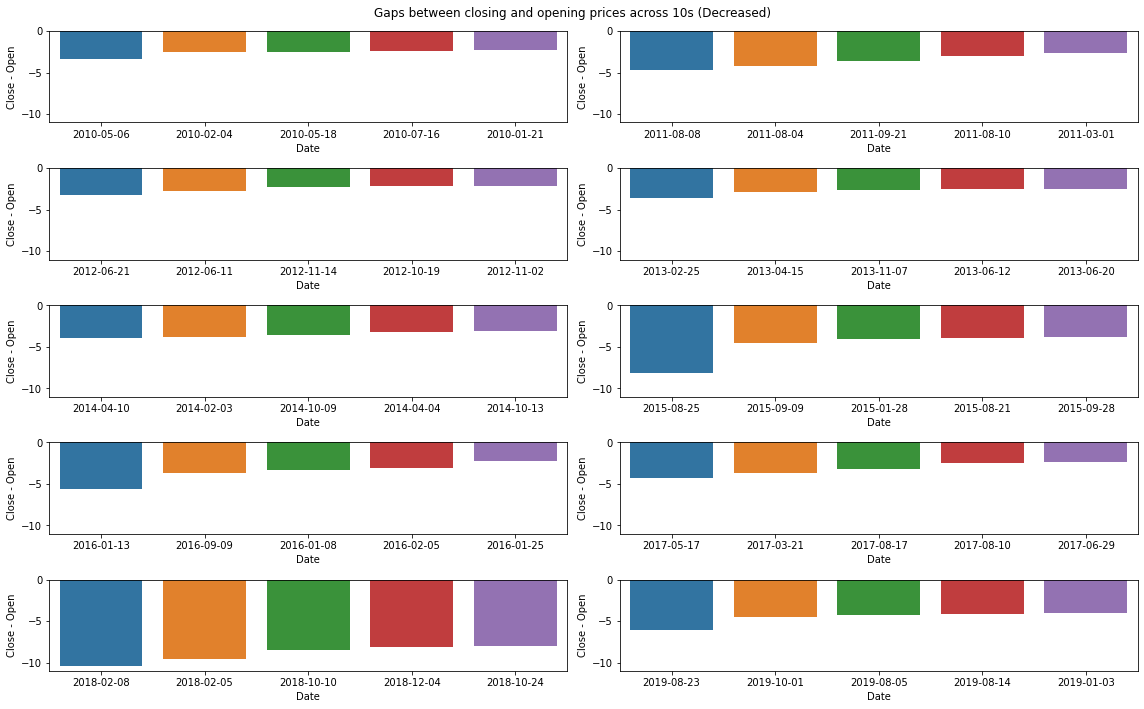

In [5]:
data10s = spydata.loc[spydata['Year'] < 2020]
allGapOpenClose = []
for index, row in data10s.iterrows():
    allGapOpenClose.append([row['Year'],row['Date'], row['Close']-row['Open']])
    
dfOpenClose = pd.DataFrame(allGapOpenClose,columns=['Year','Date','Close - Open'])

data2010 = (dfOpenClose.loc[dfOpenClose['Year'] == 2010]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2011 = (dfOpenClose.loc[dfOpenClose['Year'] == 2011]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2012 = (dfOpenClose.loc[dfOpenClose['Year'] == 2012]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2013 = (dfOpenClose.loc[dfOpenClose['Year'] == 2013]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2014 = (dfOpenClose.loc[dfOpenClose['Year'] == 2014]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2015 = (dfOpenClose.loc[dfOpenClose['Year'] == 2015]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2016 = (dfOpenClose.loc[dfOpenClose['Year'] == 2016]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2017 = (dfOpenClose.loc[dfOpenClose['Year'] == 2017]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2018 = (dfOpenClose.loc[dfOpenClose['Year'] == 2018]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]
data2019 = (dfOpenClose.loc[dfOpenClose['Year'] == 2019]).sort_values(by=['Close - Open'], axis=0).iloc[0:5]

fig, axes = plt.subplots(5, 2, figsize=(16,10))

fig.suptitle('Gaps between closing and opening prices across 10s (Decreased)')

sns.barplot(ax=axes[0,0], x=data2010.Date, y= data2010['Close - Open'])
sns.barplot(ax=axes[0,1], x=data2011.Date, y= data2011['Close - Open'])
sns.barplot(ax=axes[1,0], x=data2012.Date, y= data2012['Close - Open'])
sns.barplot(ax=axes[1,1], x=data2013.Date, y= data2013['Close - Open'])
sns.barplot(ax=axes[2,0], x=data2014.Date, y= data2014['Close - Open'])
sns.barplot(ax=axes[2,1], x=data2015.Date, y= data2015['Close - Open'])
sns.barplot(ax=axes[3,0], x=data2016.Date, y= data2016['Close - Open'])
sns.barplot(ax=axes[3,1], x=data2017.Date, y= data2017['Close - Open'])
sns.barplot(ax=axes[4,0], x=data2018.Date, y= data2018['Close - Open'])
sns.barplot(ax=axes[4,1], x=data2019.Date, y= data2019['Close - Open'])

for ax in axes:
    for a in ax:
        a.set_ylim(math.floor(dfOpenClose['Close - Open'].min()),0)

plt.tight_layout()
plt.show()

- 6th of May in 2010 had flash crash due to several possible reasons such as impact of high frequency traders, change of market structure and techinal problems
- For HFT, regulators determined that high frequency traders sold aggressively to eliminate their positions and withdrew from the markets in the face of uncertainty
- For technical issues, there were errors in the prices of some stocks and these confusing and uncertain prices was followed by many market participants attempting to drop out of the market by posting stub quotes (very low bids and very high offers). Also, at the same time, many high-frequency trading algorithms attempted to exit the market with market orders, leading to a domino effect that resulted in the flash crash plunge
- "Chief Economist of the Commodity Futures Trading Commission and several academic economists published a working paper containing a review and empirical analysis of trade data from the Flash Crash. The authors examined the characteristics and activities of buyers and sellers in the Flash Crash and determined that a large seller, a mutual fund firm, exhausted available fundamental buyers and then triggered a cascade of selling by intermediaries, particularly high-frequency trading firms. Like the SEC/CFTC report described earlier, the authors call this cascade of selling "hot potato trading", as high-frequency firms rapidly acquired and then liquidated positions among themselves at steadily declining prices."
- Info from: https://en.wikipedia.org/wiki/2010_flash_crash#Background

- Around 8th of Feburary, the economy was strong, but investors were worried about inflation, and the possibility that the Fed will raise interest rates was faster than expected to fight against it.
- "The trouble in the market began early last week, when investors focused on a number of lingering concerns. If the economy gets much stronger, it could touch off inflation, which has been mysteriously missing for the nine years of the post-crisis recovery. That could force the Federal Reserve to raise interest rates faster than planned."

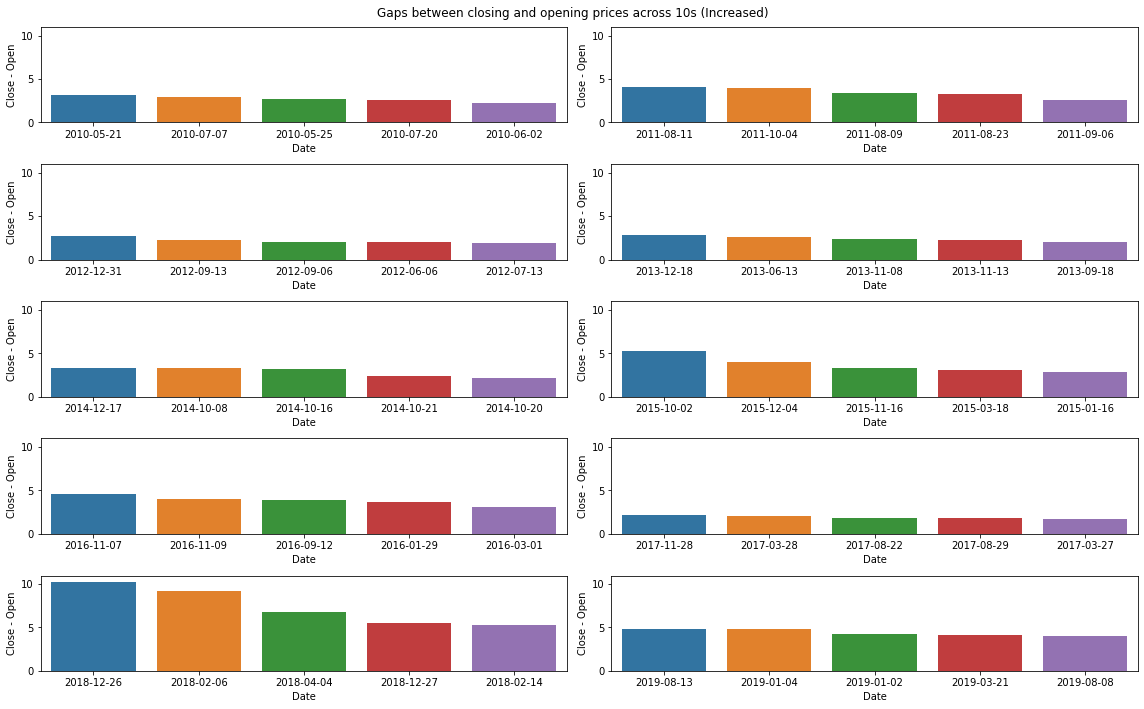

In [6]:
data2010 = (dfOpenClose.loc[dfOpenClose['Year'] == 2010]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2011 = (dfOpenClose.loc[dfOpenClose['Year'] == 2011]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2012 = (dfOpenClose.loc[dfOpenClose['Year'] == 2012]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2013 = (dfOpenClose.loc[dfOpenClose['Year'] == 2013]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2014 = (dfOpenClose.loc[dfOpenClose['Year'] == 2014]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2015 = (dfOpenClose.loc[dfOpenClose['Year'] == 2015]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2016 = (dfOpenClose.loc[dfOpenClose['Year'] == 2016]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2017 = (dfOpenClose.loc[dfOpenClose['Year'] == 2017]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2018 = (dfOpenClose.loc[dfOpenClose['Year'] == 2018]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]
data2019 = (dfOpenClose.loc[dfOpenClose['Year'] == 2019]).sort_values(by=['Close - Open'], axis=0, ascending=False).iloc[0:5]

fig, axes = plt.subplots(5, 2, figsize=(16,10))

fig.suptitle('Gaps between closing and opening prices across 10s (Increased)')

sns.barplot(ax=axes[0,0], x=data2010.Date, y= data2010['Close - Open'])
sns.barplot(ax=axes[0,1], x=data2011.Date, y= data2011['Close - Open'])
sns.barplot(ax=axes[1,0], x=data2012.Date, y= data2012['Close - Open'])
sns.barplot(ax=axes[1,1], x=data2013.Date, y= data2013['Close - Open'])
sns.barplot(ax=axes[2,0], x=data2014.Date, y= data2014['Close - Open'])
sns.barplot(ax=axes[2,1], x=data2015.Date, y= data2015['Close - Open'])
sns.barplot(ax=axes[3,0], x=data2016.Date, y= data2016['Close - Open'])
sns.barplot(ax=axes[3,1], x=data2017.Date, y= data2017['Close - Open'])
sns.barplot(ax=axes[4,0], x=data2018.Date, y= data2018['Close - Open'])
sns.barplot(ax=axes[4,1], x=data2019.Date, y= data2019['Close - Open'])

for ax in axes:
    for a in ax:
        a.set_ylim(0, math.ceil(dfOpenClose['Close - Open'].max()),)

plt.tight_layout()
plt.show()

- On 26th of December 2018, sp500 raised since "markets received the largest post-Christmas bump on record after reports of strong holiday sales from retailers" and there was "assurances that Trump would not fire the Fed chairman"
- Info from: https://www.washingtonpost.com/graphics/2018/business/stock-market-crash-comparison/

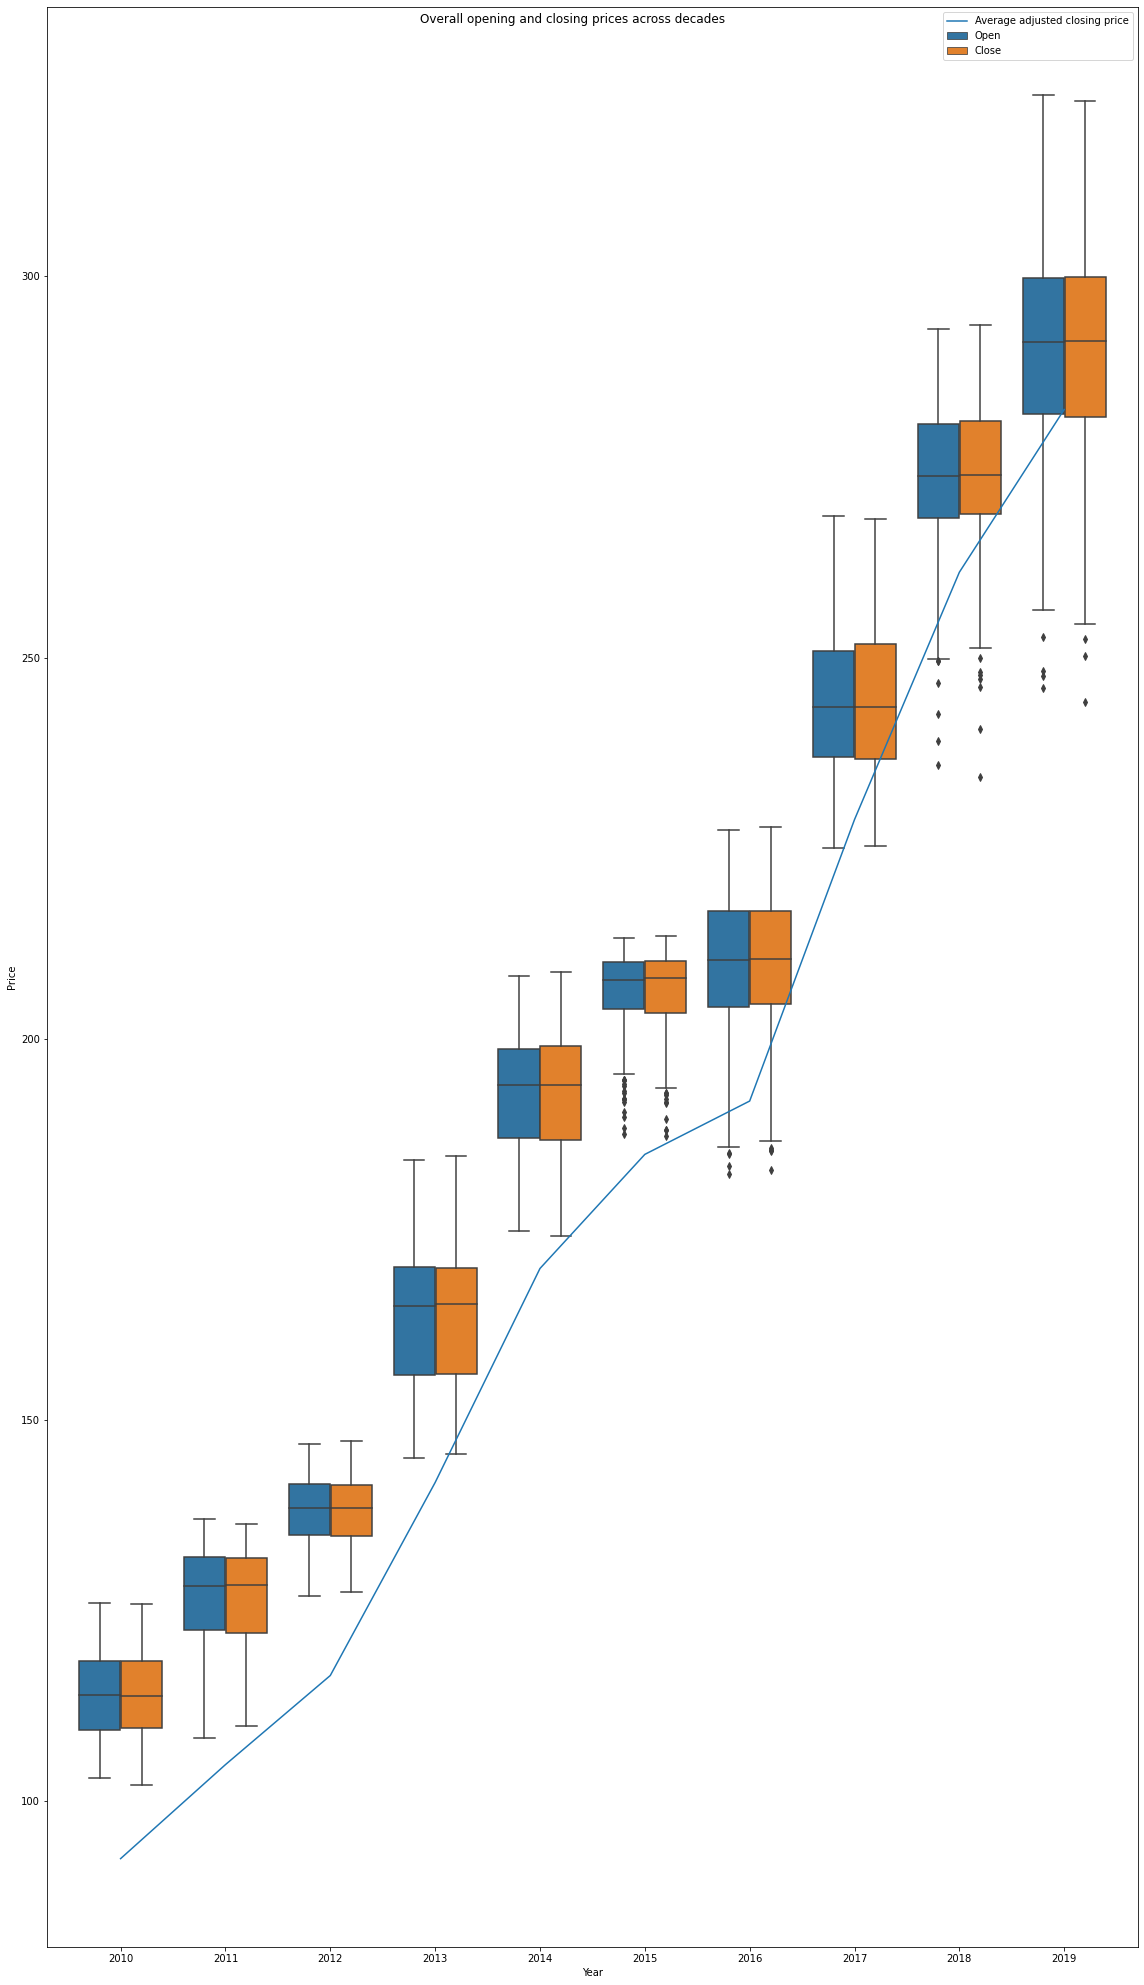

In [7]:
fig, ax1 = plt.subplots(figsize=(16,28))

fig.suptitle('Overall opening and closing prices across decades')

data = spydata.melt(id_vars=['Date','Year', 'Adj Close'], value_vars=['Open','Close'], var_name = 'State', value_name='Price')
data = data.drop(data[data.Year == 2020].index)
data = data.drop(data[data.Year < 2010].index)

col = ['Average adj close']
lst = []
years = list(range(2010, 2020))

for x in range(2010, 2020):
    lst.append(spydata.loc[spydata['Year'] == x]['Adj Close'].mean())

eachYearMean = pd.DataFrame(lst, columns=col)
eachYearMean['Year'] = years

sns.boxplot(x = data.Year, y = data.Price, data = data, hue = data.State, ax=ax1)
sns.lineplot(data=eachYearMean['Average adj close'], label="Average adjusted closing price", ax=ax1)

plt.tight_layout()
plt.show()

- From box graph above, overall prices increased rapidly both before and after 2016
- We can see stock prices on sp500 all raised without ever being dropped